# CNN to classify real-world applications
Course 2 - Week 1

This code based over the code provided during the:

**Tensorflow in Practice** - Coursera Specialization.

Original code repo: https://github.com/lmoroney/dlaicourse

To maximize the learning all the notebooks will be modified by keeping the underling goals. Finally, the ultimate goal is to learn best practices in the usage of TF an not to obtain for each notebook the best possible model.

### Download data

### Imports

In [1]:
import os
import zipfile, fnmatch

import tensorflow as tf

In [2]:
LOCAL_ZIP = "C:\git\TF_coursera\data"
PATTERN = '*.zip'

In [3]:
def unzip(rootPath, pattern):
    for root, dirs, files in os.walk(rootPath):
        unzip_path = []
        for filename in fnmatch.filter(files, pattern):
            unzip_path.append(os.path.join(root, filename.split(".")[0]))
            print(os.path.join(root, filename))
            zipfile.ZipFile(os.path.join(root, filename)).extractall(os.path.join(root, os.path.splitext(filename)[0]))
    return unzip_path

In [4]:
main_path = unzip(LOCAL_ZIP, PATTERN)

C:\git\TF_coursera\data\cats_and_dogs.zip


In [5]:
base = "C:/git/TF_coursera/data/cats_and_dogs/"
train_dir = os.path.join(base, 'cats_and_dogs_filtered/train')
validation_dir = os.path.join(base, 'cats_and_dogs_filtered/validation')

### Baseline CNN model

In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [9]:
# model compiler
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

### Image generator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model training

In [11]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=50,
                    verbose=2)

Epoch 1/15
100/100 - 3s - loss: 0.7972 - accuracy: 0.5440 - val_loss: 0.6871 - val_accuracy: 0.5250
Epoch 2/15
100/100 - 3s - loss: 0.6316 - accuracy: 0.6525 - val_loss: 0.6052 - val_accuracy: 0.6690
Epoch 3/15
100/100 - 3s - loss: 0.5661 - accuracy: 0.7050 - val_loss: 0.6062 - val_accuracy: 0.6770
Epoch 4/15
100/100 - 3s - loss: 0.4950 - accuracy: 0.7560 - val_loss: 0.5712 - val_accuracy: 0.7100
Epoch 5/15
100/100 - 3s - loss: 0.4189 - accuracy: 0.8120 - val_loss: 0.6177 - val_accuracy: 0.6880
Epoch 6/15
100/100 - 3s - loss: 0.3544 - accuracy: 0.8340 - val_loss: 0.6664 - val_accuracy: 0.6940
Epoch 7/15
100/100 - 3s - loss: 0.2523 - accuracy: 0.8920 - val_loss: 0.7332 - val_accuracy: 0.7040
Epoch 8/15
100/100 - 3s - loss: 0.1887 - accuracy: 0.9225 - val_loss: 1.0286 - val_accuracy: 0.6950
Epoch 9/15
100/100 - 3s - loss: 0.1245 - accuracy: 0.9580 - val_loss: 0.9789 - val_accuracy: 0.7050
Epoch 10/15
100/100 - 3s - loss: 0.0880 - accuracy: 0.9695 - val_loss: 1.1248 - val_accuracy: 0.7270

### Evaluate model

Text(0.5, 1.0, 'Training and validation loss')

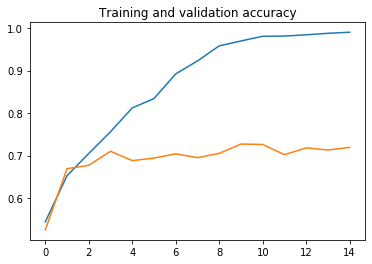

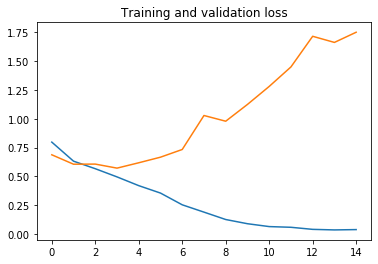

In [13]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

As you can see, we are **overfitting** like it's getting out of fashion. Our training accuracy (in blue) gets close to 100% (!) while our validation accuracy (in green) stalls as 70%. Our validation loss reaches its minimum after only five epochs.
